In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# Data Cleaning

In [7]:
# Cleaning all scores greater than hunder
df[df['Exam_Score'] > 100].shape

(1, 20)

In [8]:
index_val = df[df['Exam_Score'] > 100].index[0]
df.loc[index_val, 'Exam_Score'] = 100

In [9]:
df[df['Exam_Score'] > 100] # No more rows greater than 100

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:
# drop null values
df = df.dropna()

# Data Visualisation

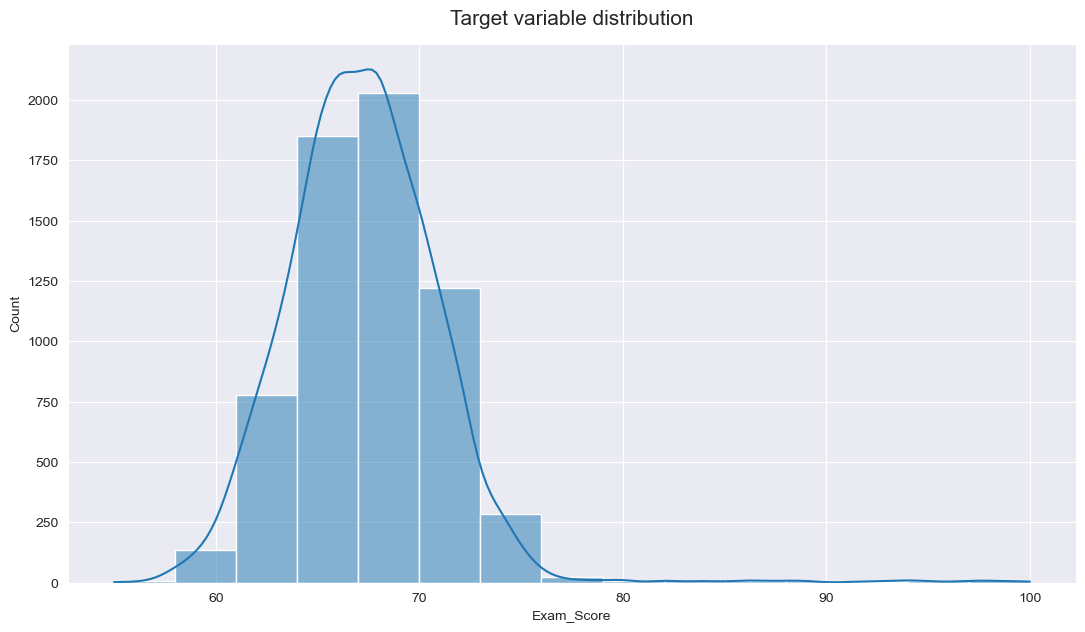

In [13]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(df.Exam_Score, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
plt.show()

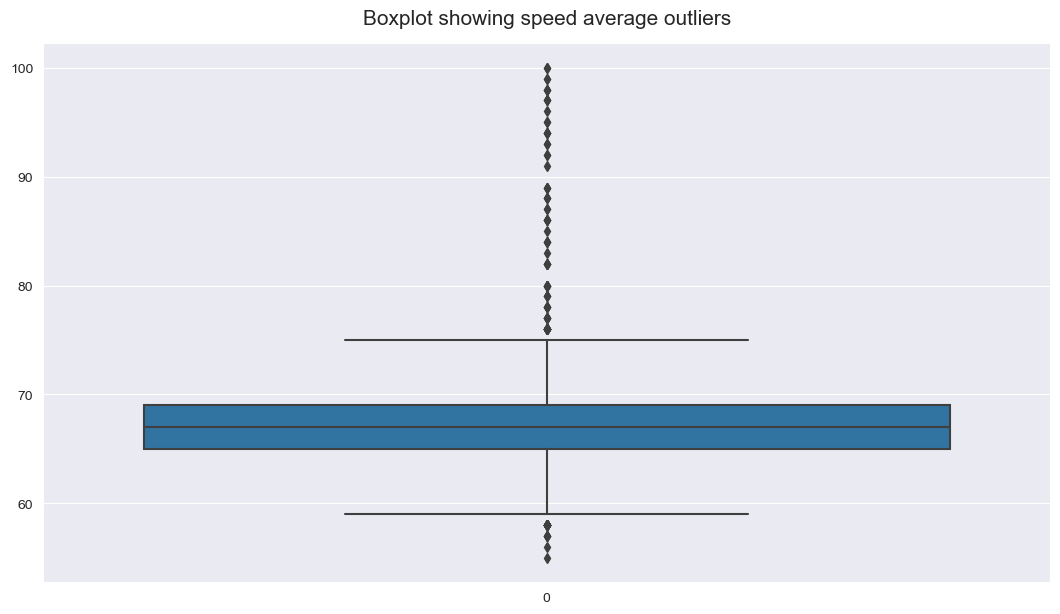

In [14]:
# Plotting boxplot for speed average
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(df.Exam_Score)
plt.title('Boxplot showing speed average outliers', y = 1.02, fontsize = 15)
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


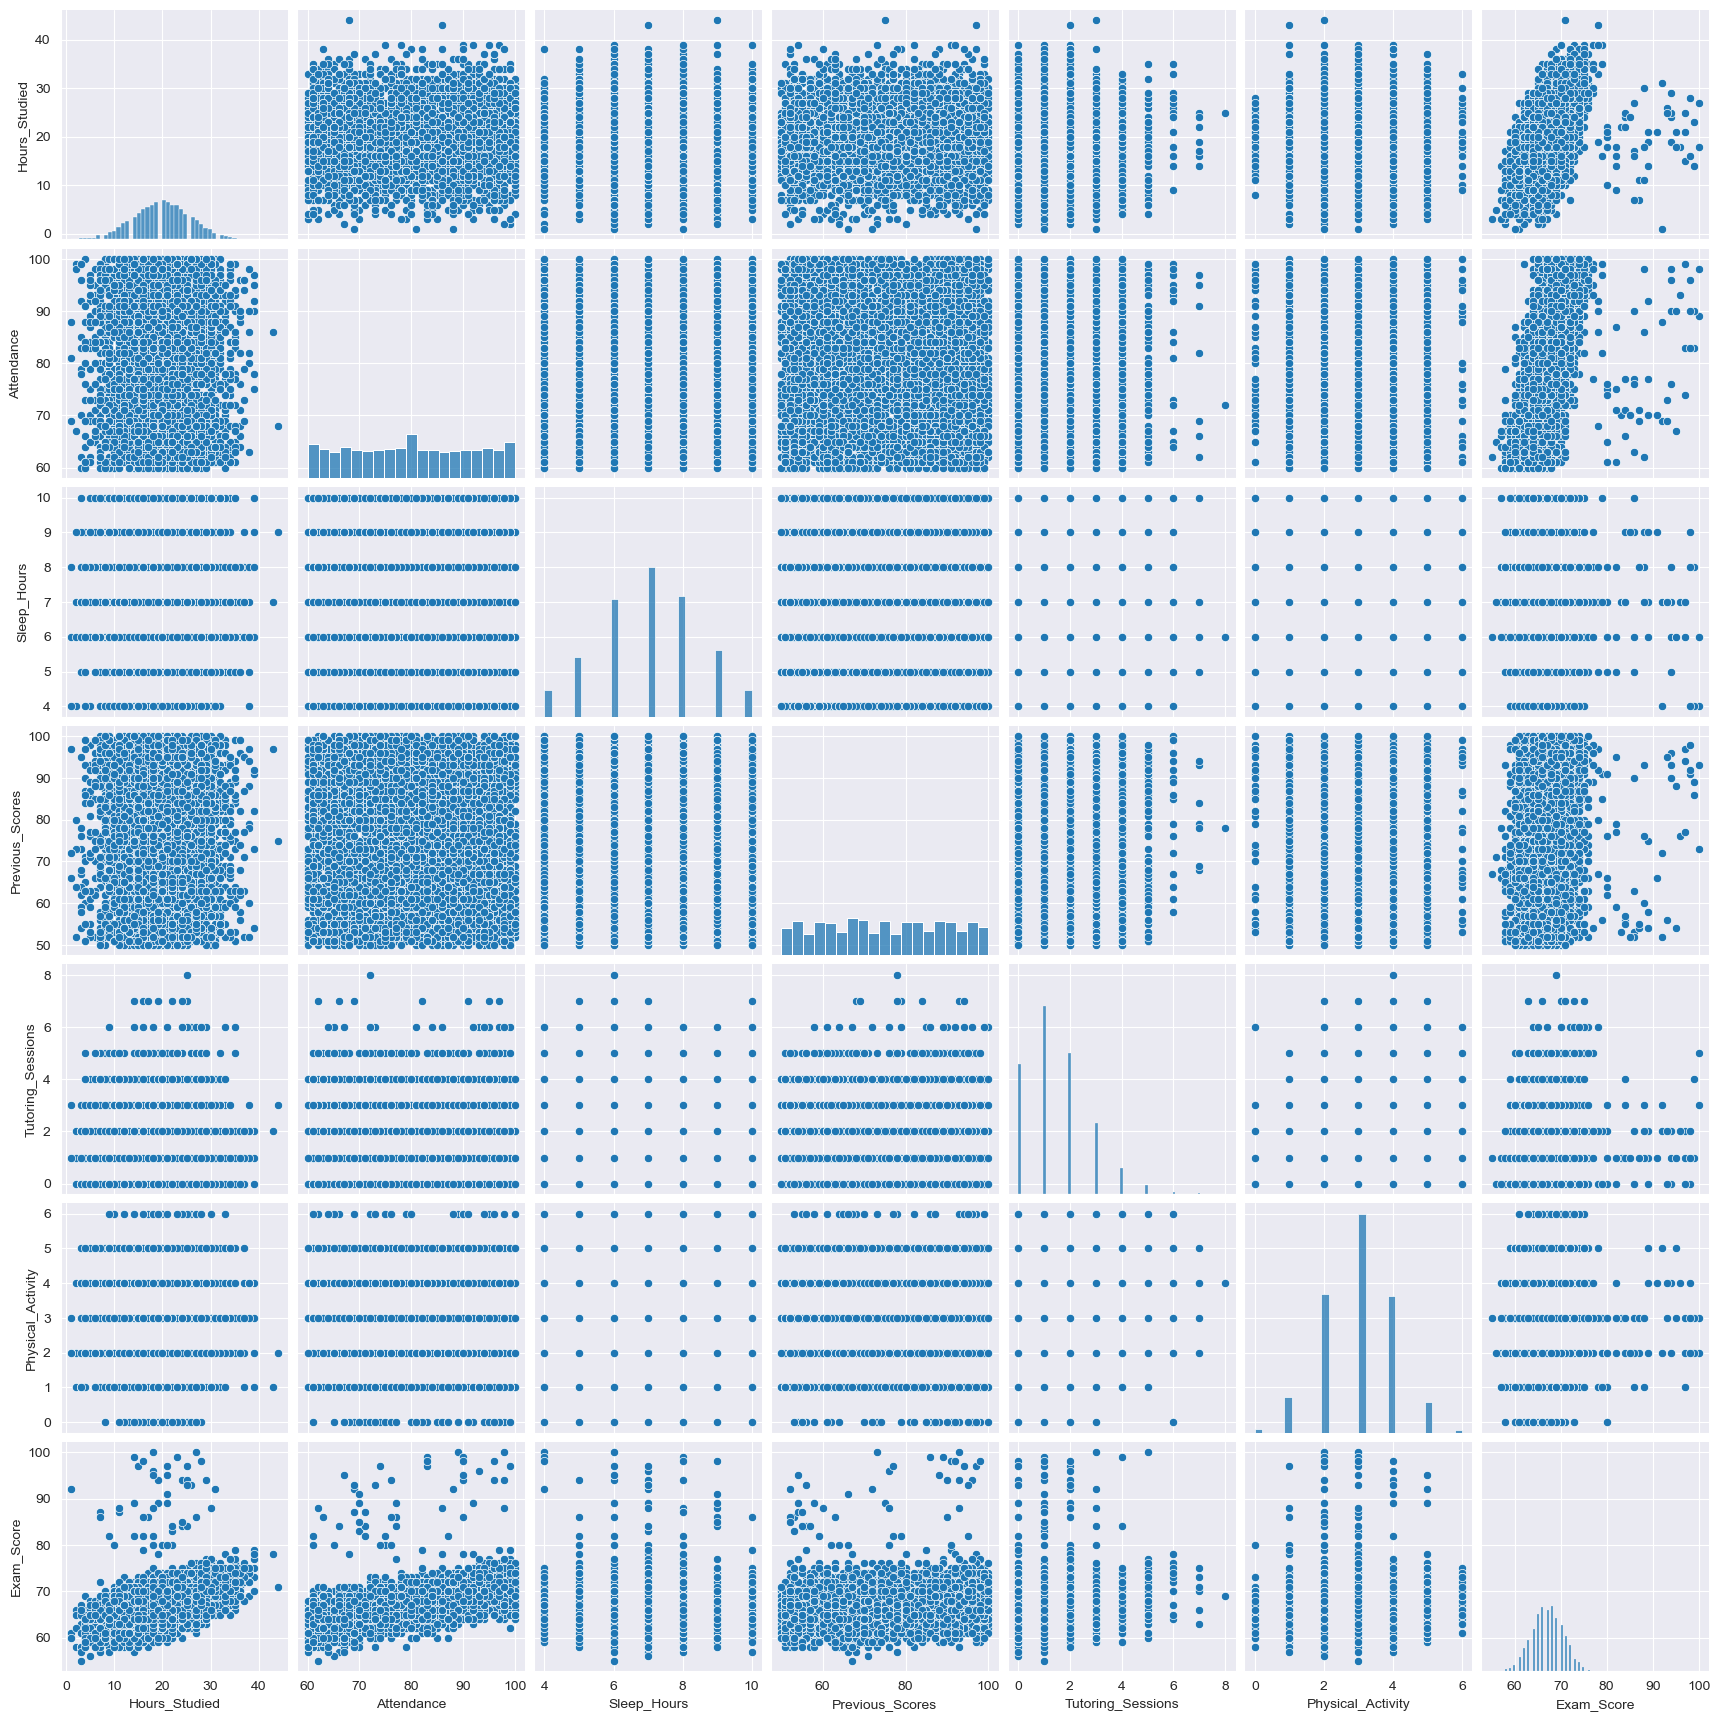

In [15]:
sns.pairplot(df)

In [16]:
# Calculating below & above percentages 
above_upper_quartile = df[df['Exam_Score'] > 69]['Exam_Score'].count() / df['Exam_Score'].count()
below_lower_quartile = df[df['Exam_Score'] < 65]['Exam_Score'].count() / df['Exam_Score'].count()

print(f"The percetage of students above the upper quartile is {round(above_upper_quartile*100, 2)}%")
print(f"The percetage of students below the lower quartile is {round(below_lower_quartile*100, 2)}%")

The percetage of students above the upper quartile is 24.79%
The percetage of students below the lower quartile is 21.89%


In [17]:
# Checking correlation between the predictor varriables
df[["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity"]].corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
Hours_Studied,1.000000,-0.004997,0.013119,0.022492,-0.009654,0.003183
Attendance,-0.004997,1.000000,-0.019602,-0.018083,0.012070,-0.022976
Sleep_Hours,0.013119,-0.019602,1.000000,-0.023238,-0.011466,-0.002898
Previous_Scores,0.022492,-0.018083,-0.023238,1.000000,-0.013158,-0.006694
Tutoring_Sessions,-0.009654,0.012070,-0.011466,-0.013158,1.000000,0.016325
Physical_Activity,0.003183,-0.022976,-0.002898,-0.006694,0.016325,1.000000


# Data Preprocessing

In [19]:
df_dummies = pd.get_dummies(df, drop_first = True, dtype = 'int')
df_dummies.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,1,0,0,...,1,1,0,1,0,1,0,0,1,1
1,19,64,8,59,2,4,61,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,24,98,7,91,2,4,74,0,1,0,...,1,1,1,0,0,0,1,0,1,1
3,29,89,8,98,1,4,71,1,0,0,...,1,1,0,0,0,1,0,1,0,1
4,19,92,6,65,3,4,70,0,1,0,...,0,1,1,0,0,0,0,0,1,0


In [20]:
X = df_dummies.drop(columns=['Exam_Score'])
y = df_dummies['Exam_Score']

# Unscaled Model - ML Fitting

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5102, 27)
y_train shape: (5102,)
X_test shape: (1276, 27)
y_test shape: (1276,)


In [24]:
RANDOM_STATE = 42

model_list = [{'model name':'Linear Regression',
              'model':linear_model.LinearRegression(),
              'notes':'Simple Linear Regression Model'},
              {'model name':'Lasso Regression Model',
              'model':linear_model.Lasso(alpha=0.05),
              'notes':'Lasso Regression Model with Aplha(0.5)'},
              {'model name':'Ride Regression Model',
              'model':linear_model.Ridge(),
              'notes':'Ridge Regression Model'},
              {'model name':'Random Forest',
              'model':RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE),
              'notes':'Random Forest Regression Model with Number of Estimators(100)'}]

In [25]:
def pre_model_building(model, X_train, y_train, X_test, y_test):
    r_m = model
    r_m.fit(X_train, y_train)
    y_pred = r_m.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, rmse, r2

In [26]:
model_name_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []
notes_list = []

for model in model_list:
    mae_value, mse_value, rmse_value, r2_value = pre_model_building(model['model'], X_train, y_train, X_test, y_test)
    model_name_list.append(model['model name'])
    mae_list.append(mae_value)
    mse_list.append(mse_value)
    rmse_list.append(rmse_value)
    r2_list.append(r2_value)
    notes_list.append(model['notes'])

model_metrics_df = pd.DataFrame({'model_name':model_name_list,
                                 'r2_score':r2_list,
                                 'rmse':rmse_list,
                                 'mae':mae_list,
                                 'mse':mse_list,
                                 'notes':notes_list})

In [27]:
model_metrics_df

,model_name,r2_score,rmse,mae,mse,notes
0,Linear Regression,0.731434,2.042874,0.487132,4.173336,Simple Linear Regression Model
1,Lasso Regression Model,0.708211,2.129368,0.768792,4.534209,Lasso Regression Model with Aplha(0.5)
2,Ride Regression Model,0.731451,2.042807,0.487063,4.173062,Ridge Regression Model
3,Random Forest,0.610951,2.458771,1.245752,6.045557,Random Forest Regression Model with Number of ...


## Model Building (Linear Regression)

In [29]:
lr = linear_model.LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [32]:
for i, column in enumerate(X.columns):
    print(f"{column} : {round(lr.coef_[i], 4)}")

Hours_Studied : 0.2958
Attendance : 0.1987
Sleep_Hours : -0.0127
Previous_Scores : 0.0485
Tutoring_Sessions : 0.4823
Physical_Activity : 0.2002
Parental_Involvement_Low : -2.0133
Parental_Involvement_Medium : -1.0385
Access_to_Resources_Low : -2.0504
Access_to_Resources_Medium : -1.0113
Extracurricular_Activities_Yes : 0.5664
Motivation_Level_Low : -1.108
Motivation_Level_Medium : -0.5989
Internet_Access_Yes : 0.9032
Family_Income_Low : -1.1475
Family_Income_Medium : -0.6199
Teacher_Quality_Low : -1.0499
Teacher_Quality_Medium : -0.6055
School_Type_Public : 0.0487
Peer_Influence_Neutral : 0.5619
Peer_Influence_Positive : 1.0144
Learning_Disabilities_Yes : -0.8703
Parental_Education_Level_High School : -0.4767
Parental_Education_Level_Postgraduate : 0.5216
Distance_from_Home_Moderate : 0.3044
Distance_from_Home_Near : 0.8419
Gender_Male : -0.0104


In [33]:
c = lr.intercept_
print(f"Intercept: {c}")

Intercept: 42.050571723999326


In [34]:
y_pred = lr.predict(X_test)
y_pred.shape

(1276,)

In [35]:
mean_absolute_error_value = mean_absolute_error(y_test, y_pred)
mean_squared_error_value = mean_squared_error(y_test, y_pred) 
r2_score_value = r2_score(y_test, y_pred)

In [36]:
print(f"Mean Abosolute Error: {mean_absolute_error_value}")
print(f"Mean Squared Error: {mean_squared_error_value}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error_value)}")
print(f"r2 Score: {r2_score_value}")

Mean Abosolute Error: 0.48713181568860103
Mean Squared Error: 4.173335895104826
Root Mean Squared Error: 2.0428744198077435
r2 Score: 0.7314339008546544


# Scaled Model

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
model_name_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []
notes_list = []

for model in model_list:
    mae_value, mse_value, rmse_value, r2_value = pre_model_building(model['model'], X_train, y_train, X_test, y_test)
    model_name_list.append(model['model name'])
    mae_list.append(mae_value)
    mse_list.append(mse_value)
    rmse_list.append(rmse_value)
    r2_list.append(r2_value)
    notes_list.append(model['notes'])

model_metrics_df = pd.DataFrame({'model_name':model_name_list,
                                 'r2_score':r2_list,
                                 'rmse':rmse_list,
                                 'mae':mae_list,
                                 'mse':mse_list,
                                 'notes':notes_list})

In [40]:
model_metrics_df

,model_name,r2_score,rmse,mae,mse,notes
0,Linear Regression,0.731434,2.042874,0.487132,4.173336,Simple Linear Regression Model
1,Lasso Regression Model,0.726967,2.059792,0.568731,4.242741,Lasso Regression Model with Aplha(0.5)
2,Ride Regression Model,0.731438,2.042860,0.487138,4.173277,Ridge Regression Model
3,Random Forest,0.611831,2.455991,1.245353,6.031890,Random Forest Regression Model with Number of ...


# Variable Selection

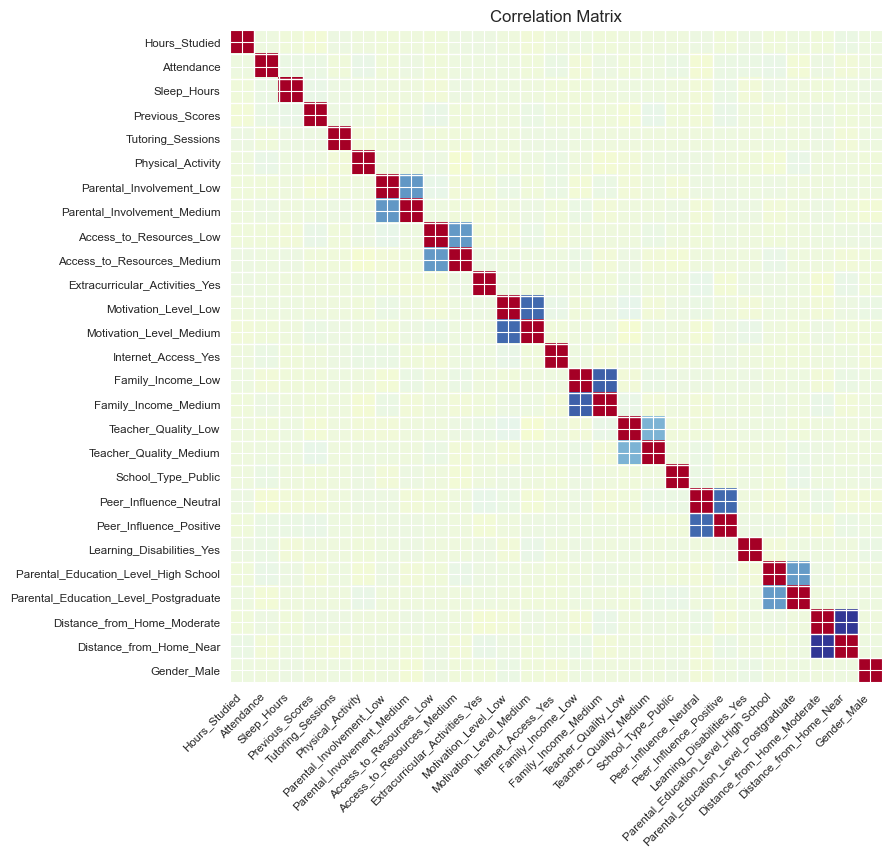

In [42]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(9,9));
ax = fig.add_subplot(111);
plot_corr(df_dummies.drop(columns=['Exam_Score']).corr(), xnames = df_dummies.drop(columns=['Exam_Score']).corr().columns, ax = ax);

In [43]:
df_dummies.drop(columns=['Exam_Score']).corr()['Motivation_Level_Medium'].sort_values()

Motivation_Level_Low                    -0.652348
Learning_Disabilities_Yes               -0.021536
Previous_Scores                         -0.019475
Access_to_Resources_Low                 -0.016149
Distance_from_Home_Moderate             -0.010297
Tutoring_Sessions                       -0.009982
Peer_Influence_Positive                 -0.008778
Parental_Involvement_Medium             -0.008762
Physical_Activity                       -0.006917
Teacher_Quality_Medium                  -0.004349
Family_Income_Medium                    -0.002757
Access_to_Resources_Medium              -0.000698
Extracurricular_Activities_Yes           0.000543
School_Type_Public                       0.001111
Sleep_Hours                              0.003380
Family_Income_Low                        0.003558
Parental_Education_Level_High School     0.004846
Parental_Involvement_Low                 0.007637
Gender_Male                              0.007776
Distance_from_Home_Near                  0.009519


In [44]:
# Calculate correlations between predictor variables and the response variable
corrs = df_dummies.corr()['Exam_Score'].sort_values(ascending=False)
corrs

Exam_Score                               1.000000
Attendance                               0.580394
Hours_Studied                            0.445209
Previous_Scores                          0.174292
Tutoring_Sessions                        0.156769
Parental_Education_Level_Postgraduate    0.092298
Distance_from_Home_Near                  0.081280
Peer_Influence_Positive                  0.080214
Extracurricular_Activities_Yes           0.063051
Internet_Access_Yes                      0.051281
Physical_Activity                        0.025155
Family_Income_Medium                     0.024963
Motivation_Level_Medium                  0.022556
Gender_Male                             -0.004887
Peer_Influence_Neutral                  -0.007443
School_Type_Public                      -0.010898
Sleep_Hours                             -0.017149
Access_to_Resources_Medium              -0.024628
Parental_Involvement_Medium             -0.036162
Teacher_Quality_Low                     -0.040883


In [45]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
p_val_list = []

column_titles = [col for col in corrs.index if col!= 'Exam_Score']

for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['Exam_Score'])[1], 6)
    p_val_list.append(p_val)
    
df_p_val = pd.DataFrame({'Variable_Name':list(corrs.index)[1:],
                        'Correlation_Coefficient':list(corrs.values)[1:],
                        'P_Value':p_val_list})

In [46]:
df_p_val

,Variable_Name,Correlation_Coefficient,P_Value
0,Attendance,0.580394,0.000000
1,Hours_Studied,0.445209,0.000000
2,Previous_Scores,0.174292,0.000000
3,Tutoring_Sessions,0.156769,0.000000
4,Parental_Education_Level_Postgraduate,0.092298,0.000000
5,Distance_from_Home_Near,0.081280,0.000000
6,Peer_Influence_Positive,0.080214,0.000000
7,Extracurricular_Activities_Yes,0.063051,0.000000
8,Internet_Access_Yes,0.051281,0.000042
9,Physical_Activity,0.025155,0.044550


If we were to use a logic test with a significance value of 5% (**p-value < 0.05**), we could infer that the following features are statistically significant

In [48]:
df_p_val_sorted = df_p_val.sort_values('P_Value')
df_p_val_sorted[df_p_val_sorted['P_Value']<0.05]

,Variable_Name,Correlation_Coefficient,P_Value
0,Attendance,0.580394,0.000000
24,Parental_Education_Level_High School,-0.090484,0.000000
23,Family_Income_Low,-0.084052,0.000000
22,Learning_Disabilities_Yes,-0.083926,0.000000
21,Motivation_Level_Low,-0.080151,0.000000
25,Parental_Involvement_Low,-0.112528,0.000000
7,Extracurricular_Activities_Yes,0.063051,0.000000
26,Access_to_Resources_Low,-0.131301,0.000000
1,Hours_Studied,0.445209,0.000000
2,Previous_Scores,0.174292,0.000000


In [49]:
df_p_val[df_p_val['P_Value'] < 0.05]['Variable_Name'].values

array(['Attendance', 'Hours_Studied', 'Previous_Scores',
       'Tutoring_Sessions', 'Parental_Education_Level_Postgraduate',
       'Distance_from_Home_Near', 'Peer_Influence_Positive',
       'Extracurricular_Activities_Yes', 'Internet_Access_Yes',
       'Physical_Activity', 'Family_Income_Medium',
       'Access_to_Resources_Medium', 'Parental_Involvement_Medium',
       'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'Distance_from_Home_Moderate', 'Motivation_Level_Low',
       'Learning_Disabilities_Yes', 'Family_Income_Low',
       'Parental_Education_Level_High School', 'Parental_Involvement_Low',
       'Access_to_Resources_Low'], dtype=object)

In [50]:
# The dependent variable remains the same:
y_name = 'Exam_Score'
y = df_dummies[y_name]

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_p_val[df_p_val['P_Value'] < 0.05]['Variable_Name'].values)
X = df_dummies[X_names]

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [51]:
model_name_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []
notes_list = []

for model in model_list:
    mae_value, mse_value, rmse_value, r2_value = pre_model_building(model['model'], X_train, y_train, X_test, y_test)
    model_name_list.append(model['model name'])
    mae_list.append(mae_value)
    mse_list.append(mse_value)
    rmse_list.append(rmse_value)
    r2_list.append(r2_value)
    notes_list.append(model['notes'])

model_metrics_df = pd.DataFrame({'model_name':model_name_list,
                                 'r2_score':r2_list,
                                 'rmse':rmse_list,
                                 'mae':mae_list,
                                 'mse':mse_list,
                                 'notes':notes_list})

In [52]:
model_metrics_df

,model_name,r2_score,rmse,mae,mse,notes
0,Linear Regression,0.730480,2.046497,0.544610,4.188151,Simple Linear Regression Model
1,Lasso Regression Model,0.724714,2.068276,0.613751,4.277765,Lasso Regression Model with Aplha(0.5)
2,Ride Regression Model,0.730478,2.046505,0.544670,4.188184,Ridge Regression Model
3,Random Forest,0.622423,2.422250,1.203174,5.867293,Random Forest Regression Model with Number of ...


In [53]:
def train_rf_model(data, target_variable, n_estimators):

    # Splitting the dataset into features and target variable
    X = data.drop(columns=[target_variable])  # Features
    y = data[target_variable]  # Target variable

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initializing the RandomForestRegressor with n_estimators
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Training the model on the training set
    rf_model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluating the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Return the trained model and its performance metrics
    return rf_model, {'RMSE': rmse, 'R2': r2}


In [54]:
def train_rf_model_v2(X, y, n_estimators):
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initializing the RandomForestRegressor with n_estimators
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Training the model on the training set
    rf_model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluating the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Return the trained model and its performance metrics
    return rf_model, {'RMSE': rmse, 'R2': r2}

In [55]:
df_dummies.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Extracurricular_Activities_Yes', 'Motivation_Level_Low',
       'Motivation_Level_Medium', 'Internet_Access_Yes', 'Family_Income_Low',
       'Family_Income_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'School_Type_Public', 'Peer_Influence_Neutral',
       'Peer_Influence_Positive', 'Learning_Disabilities_Yes',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate',
       'Distance_from_Home_Near', 'Gender_Male'],
      dtype='object')

In [56]:
# Number of estimators to evaluate
estimators_list = [50, 100, 200]

# Dictionary to store results
results = {}

# Train and evaluate models with different numbers of estimators
for n in estimators_list:
    # Store the entire returned dictionary as the value for each key
    model, metric = train_rf_model(df_dummies, 'Exam_Score', n)
    results[f"{n} trees"] = metric
    
results

{'50 trees': {'RMSE': 2.492140938566728, 'R2': 0.6003194178071201},
 '100 trees': {'RMSE': 2.4587714838982797, 'R2': 0.61095110533456},
 '200 trees': {'RMSE': 2.439781839262989, 'R2': 0.6169373233274136}}

In [57]:
### START FUNCTION
def sklearn_kfold_split(data,K):
    # your code here

    # Setting parrameters for splitting
    # IF shuffle=False THEN random_state=None
    #kf = KFold(n_splits=K, shuffle=True, random_state=42)
    kf = KFold(n_splits=K, shuffle=False, random_state=None)

    # Applying splitting to the dataset
    kf.get_n_splits(data)

    # Adding all splits to a list
    k_fold_splits = []
    for x in kf.split(data):
        k_fold_splits.append(x)
    
    return k_fold_splits
    
### END FUNCTION

In [58]:
def best_k_model(data, data_indices, response_variable):
    # your code here
    best_model = ""
    model_r2 = ""
    highest_rmse = float('-inf')

    for single_data_indices in data_indices:
        
        X = data.drop(columns=[response_variable])
        y = data[response_variable]

        # Splitting the data into its training and testing sets
        X_train, y_train = X.loc[single_data_indices[0]], y.loc[single_data_indices[0]]
        X_test, y_test = X.loc[single_data_indices[1]], y.loc[single_data_indices[1]]
        
        # Initializing the RandomForestRegressor with default parameters and a random state of 42
        rf_model = RandomForestRegressor(random_state=42)

        # Fitting the training data to the model
        rf_model.fit(X_train, y_train) # if just one PREDICTOR variable -> rf_model.fit(X_train.reshape(-1,1), y_train)
        
        # Making predictions on the test set
        y_pred = rf_model.predict(X_test) # if just one PREDICTOR variable -> y_pred = rf_model.predict(X_test.reshape(-1,1))
        
        # Changing the testing data type from U32 to float64
        # y_test = y_test.astype(float)
        
        # Calculating the current Mean Squarred Error 
        rmse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Checking for the best model by using the higest Mean Squarred Error
        if rmse > highest_rmse:
            highest_rmse = rmse
            model_r2 = r2
            best_model = rf_model

    return best_model, r2, rmse

In [66]:
kfold_splits = sklearn_kfold_split(np.array(df_dummies),5)

In [ ]:
model, r2_fit, model_rmse = best_k_model(df_dummies, kfold_splits, 'Exam_Score')

In [ ]:
print(f"""
Random Forest Model With {K} splits - 
r2_ score : {r2_fit}
rmse : {model_rmse}          
""")